In [1]:
import torchvision
import torchvision.transforms as transforms
import os
from matplotlib import pyplot as plt
import pickle
import numpy as np
from noise import noise_data

transform_train = transforms.Compose([
    # transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    # correct the normalization by https://github.com/kuangliu/pytorch-cifar/issues/19
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True,
    download=True, transform=transform_train)

Files already downloaded and verified


In [2]:
trainset[0][0].numpy().shape

(3, 32, 32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


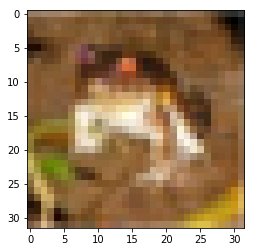

In [3]:
recovered_data = trainset[0][0].numpy() * np.expand_dims(np.expand_dims(np.array((0.247, 0.243, 0.261)), 1), 2)
recovered_data += np.expand_dims(np.expand_dims(np.array((0.4914, 0.4822, 0.4465)), 1), 2)
plt.imshow(recovered_data.transpose(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


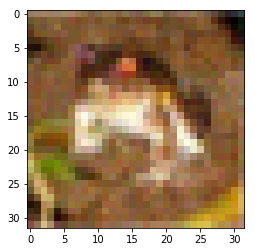

In [4]:
noise_func = noise_data(noise_type="gauss")
noisy_data = noise_func(trainset[0][0].numpy())

noisy_data = noisy_data * np.expand_dims(np.expand_dims(np.array((0.247, 0.243, 0.261)), 1), 2)
noisy_data += np.expand_dims(np.expand_dims(np.array((0.4914, 0.4822, 0.4465)), 1), 2)
plt.imshow(noisy_data.transpose(1, 2, 0))

In [5]:
recovered_data += np.expand_dims(np.expand_dims(np.array((0.4914, 0.4822, 0.4465)), 1), 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


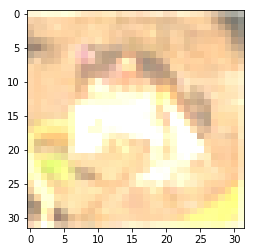

In [6]:
plt.imshow(recovered_data.transpose(1, 2, 0))

In [7]:
trainset[0][1]

6

In [8]:
path = os.path.join('./data/', 'cifar-10-batches-py', 'batches.meta')

with open(path, 'rb') as infile:
    data = pickle.load(infile, encoding='latin1')
data['label_names']

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
trainset.class_to_idx

AttributeError: 'CIFAR10' object has no attribute 'class_to_idx'

In [ ]:
trainset.base_folder